# Signal Processing
## Assignment 1
### Dimitrije Zdrale and Marija Brkic

## Guitar tuner

In [1]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# A function for defining a note

NOTE_FREQS = {"E1":329.63, "B2":246.94, "G3":196.00, "D4":146.83, "A5":110.00, "E6":82.41}

def note(freq):
    if freq>=329.63-0.15 and freq<=329.63+0.15:
        print("The note is E1")
    elif freq>=246.94-0.15 and freq<=246.94+0.15:
        print("The note is B2")
    elif freq>=196.00-0.15 and freq<=196.00+0.15:
        print("The note is G3")
    elif freq>=146.83-0.08 and freq<=146.83+0.08:
        print("The note is D4")
    elif freq>=110.00-0.08 and freq<=110.00+0.08:
        print("The note is A5")
    elif freq>=82.41-0.04 and freq<=82.41+0.04:
        print("The note is E6")
    

In [3]:
def closest_note(freq):
    diff = [np.abs(329.63-freq), np.abs(246.94-freq), np.abs(196.00-freq), np.abs(146.83-freq), np.abs(110.00-freq), np.abs(82.41-freq)]
    min_diff_idx = np.argmin(diff)
    notes = ["E1", "B2", "G3", "D4", "A5", "E6"]
    tolerance = [0.15, 0.15, 0.15, 0.08, 0.08, 0.04]
    return notes[min_diff_idx], diff[min_diff_idx], diff[min_diff_idx]<tolerance[min_diff_idx]

In [4]:

def cents_off(freq, ref):
    return 1200 * np.log2(freq / ref)

def detect_with_cents(freq):
    names = list(NOTE_FREQS.keys())
    refs  = np.array(list(NOTE_FREQS.values()))
    i = np.argmin(np.abs(refs - freq))
    name = names[i]; ref = refs[i]
    cents = cents_off(freq, ref)
    return name, ref, cents


In [5]:
sr, data = wavfile.read("data/string_1.wav") #sr je frekvencija odabiranja znaci toliko i toliko odbiraka po sekundi
print(sr, data.shape)

44100 (237568,)


Text(0, 0.5, 'Signal')

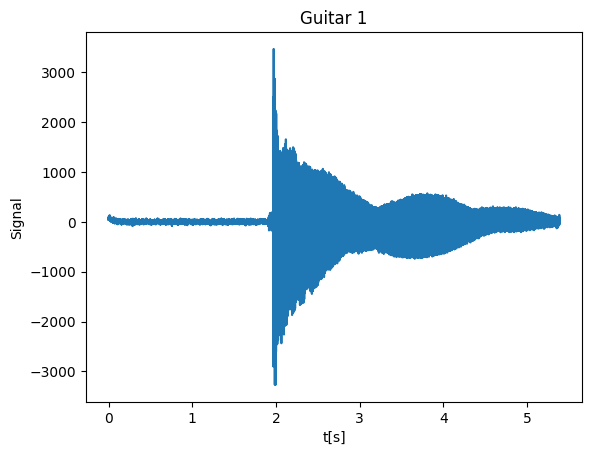

In [6]:
#t je vreme trajanja signala
t = np.arange(len(data))/sr

plt.figure()
plt.plot(t, data)
plt.title("Guitar 1")
plt.xlabel("t[s]")
plt.ylabel("Signal")

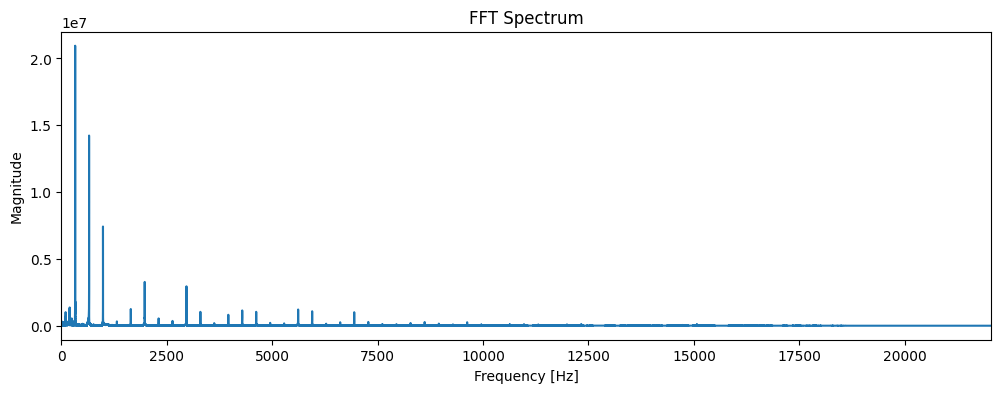

In [7]:
N = len(data)

fft_vals = np.fft.fft(data)
fft_freqs = np.fft.fftfreq(N, 1/sr)

idx = np.where(fft_freqs >= 0)
fft_vals = fft_vals[idx]
fft_freqs = fft_freqs[idx]

plt.figure(figsize=(12, 4))
plt.plot(fft_freqs, np.abs(fft_vals))
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.title("FFT Spectrum")
plt.xlim(0, sr/2)  # Nyquist limit
plt.show()


In [8]:
ind = np.argmax(np.abs(fft_vals))
freq = fft_freqs[ind]
note, diff, in_tune = closest_note(freq)
name, ref, cents = detect_with_cents(freq)
print("The note is " + note)
if in_tune:
    print("It is in tune")
else:
    print("Not in tune")
    
print(f"Detected: {name} (ref {ref:.2f} Hz)  → {cents:+.2f} cents")    

The note is E1
It is in tune
Detected: E1 (ref 329.63 Hz)  → +0.27 cents


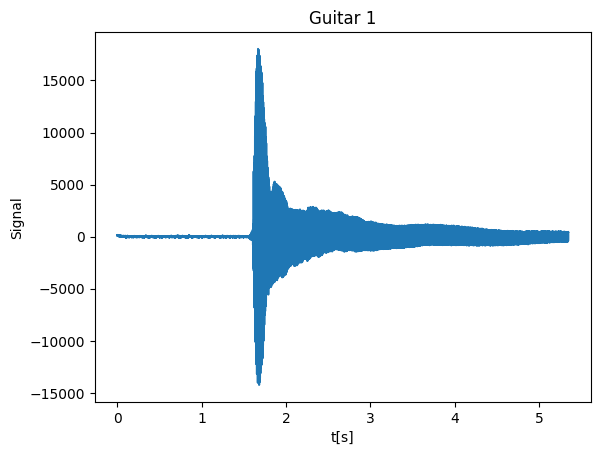

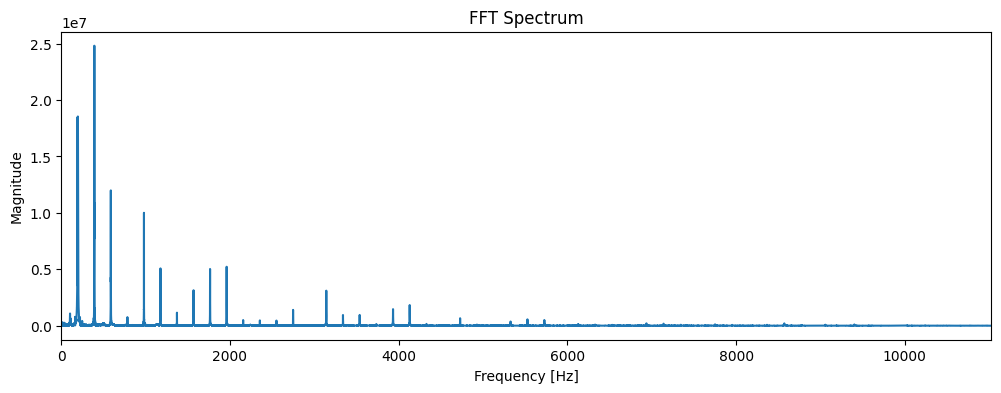

392.14710970893543


In [9]:
sr, data = wavfile.read("data/string_2.wav") #sr je frekvencija odabiranja znaci toliko i toliko odbiraka po sekundi
t = np.arange(len(data))/sr

plt.figure()
plt.plot(t, data)
plt.title("Guitar 1")
plt.xlabel("t[s]")
plt.ylabel("Signal")

N = len(data)

fft_vals = np.fft.fft(data)
fft_freqs = np.fft.fftfreq(N, 1/sr)

idx = np.where(fft_freqs >= 0)
fft_vals = fft_vals[idx]
fft_freqs = fft_freqs[idx]

plt.figure(figsize=(12, 4))
plt.plot(fft_freqs, np.abs(fft_vals))
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.title("FFT Spectrum")
plt.xlim(0, sr/2)  # Nyquist limit
plt.show()
ind = np.argmax(np.abs(fft_vals))
freq = fft_freqs[ind]

print(freq)


In [10]:
note, diff, in_tune = closest_note(freq)
name, ref, cents = detect_with_cents(freq)
print("The note is " + note)
if in_tune:
    print("It is in tune")
else:
    print("Not in tune")
print(f"Detected: {name} (ref {ref:.2f} Hz)  → {cents:+.2f} cents")

The note is E1
Not in tune
Detected: E1 (ref 329.63 Hz)  → +300.66 cents


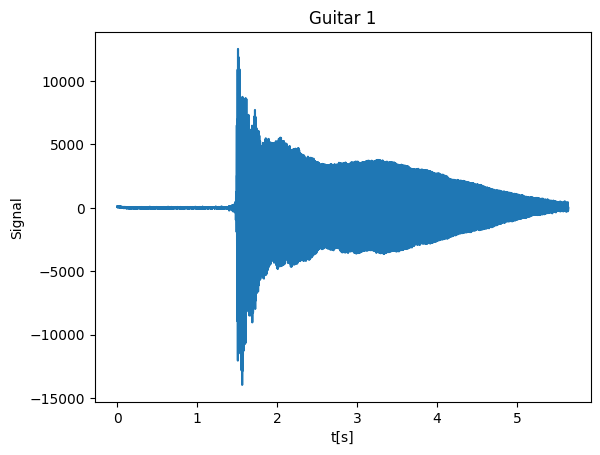

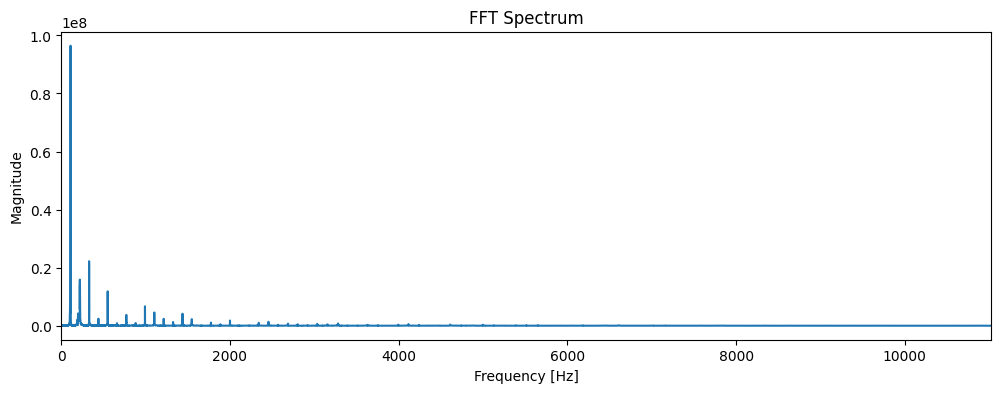

The note is A5
Not in tune
Detected: A5 (ref 110.00 Hz)  → +1.92 cents


In [11]:
sr, data = wavfile.read("data/string_3.wav") #sr je frekvencija odabiranja znaci toliko i toliko odbiraka po sekundi
t = np.arange(len(data))/sr

plt.figure()
plt.plot(t, data)
plt.title("Guitar 1")
plt.xlabel("t[s]")
plt.ylabel("Signal")

N = len(data)

fft_vals = np.fft.fft(data)
fft_freqs = np.fft.fftfreq(N, 1/sr)

idx = np.where(fft_freqs >= 0)
fft_vals = fft_vals[idx]
fft_freqs = fft_freqs[idx]

plt.figure(figsize=(12, 4))
plt.plot(fft_freqs, np.abs(fft_vals))
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.title("FFT Spectrum")
plt.xlim(0, sr/2)  # Nyquist limit
plt.show()
ind = np.argmax(np.abs(fft_vals))
freq = fft_freqs[ind]
note, diff, in_tune = closest_note(freq)
print("The note is " + note)
if in_tune:
    print("It is in tune")
else:
    print("Not in tune")
    
name, ref, cents = detect_with_cents(freq)
print(f"Detected: {name} (ref {ref:.2f} Hz)  → {cents:+.2f} cents")    

In [12]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

notes_freqs = {
    "E1": 329.63,
    "B2": 246.94,
    "G3": 196.00,
    "D4": 146.83,
    "A5": 110.00,
    "E6": 82.41
}
tolerances = {
    "E1": 0.15,
    "B2": 0.15,
    "G3": 0.15,
    "D4": 0.08,
    "A5": 0.08,
    "E6": 0.04
}



def analyze_note(wav_path):
    sr, data = wavfile.read(wav_path)
    if data.ndim > 1:  
        data = data.mean(axis=1)
    N = len(data)
    t = np.arange(N) / sr
    fft_vals = np.fft.fft(data)
    fft_freqs = np.fft.fftfreq(N, 1/sr)
    idx = np.where(fft_freqs >= 0)
    fft_vals = fft_vals[idx]
    fft_freqs = fft_freqs[idx]

    fig, axs = plt.subplots(1, 2, figsize=(14, 4))
    axs[0].plot(t, data)
    axs[0].set_title("Time Domain Signal")
    axs[0].set_xlabel("Time [s]")
    axs[0].set_ylabel("Amplitude")
    axs[1].plot(fft_freqs, np.abs(fft_vals))
    axs[1].set_title("Magnitude Spectrum")
    axs[1].set_xlabel("Frequency [Hz]")
    axs[1].set_ylabel("Magnitude")
    axs[1].set_xlim(0, sr/2)
    plt.tight_layout()
    plt.show()


    ind = np.argmax(np.abs(fft_vals))
    freq = fft_freqs[ind]

    diffs = {note: abs(freq - f) for note, f in notes_freqs.items()}
    closest = min(diffs, key=diffs.get)
    in_tune = diffs[closest] < tolerances[closest]

    print(f"Detected frequency: {freq:.2f} Hz")
    print(f"Closest note: {closest} ({notes_freqs[closest]} Hz)")
    print(f"Difference: {diffs[closest]:.2f} Hz")
    print("In tune!" if in_tune else "Not in tune.")


String 1:

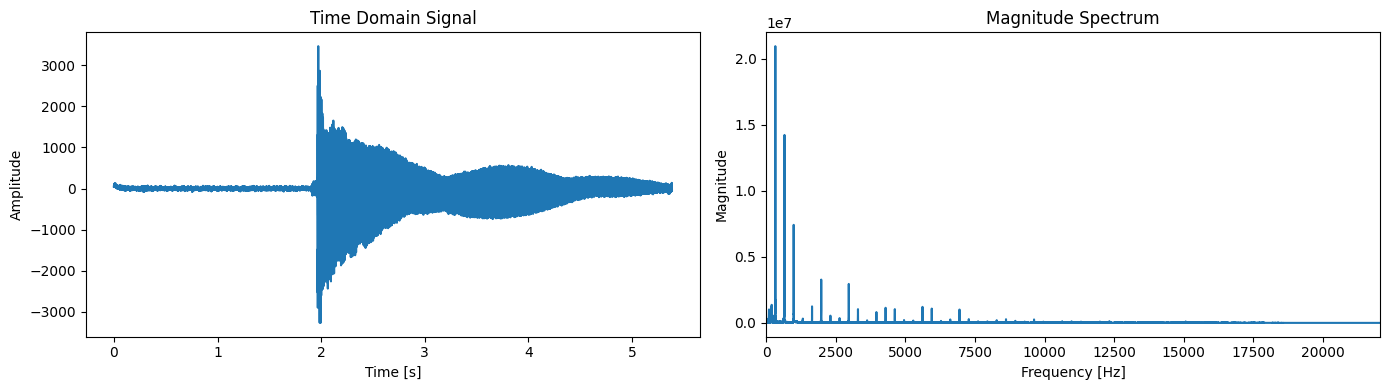

Detected frequency: 329.68 Hz
Closest note: E1 (329.63 Hz)
Difference: 0.05 Hz
In tune!


In [13]:
analyze_note("data/string_1.wav")

String 2:

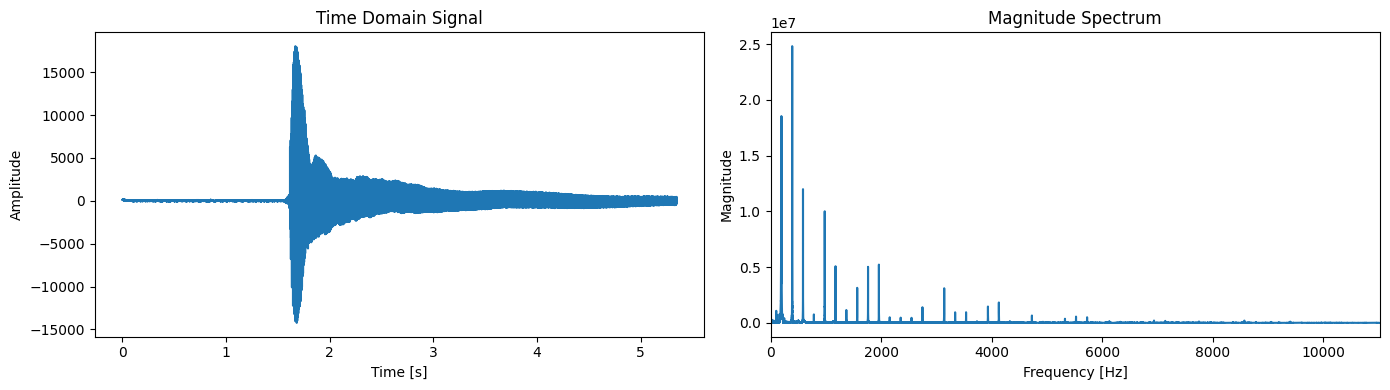

Detected frequency: 392.15 Hz
Closest note: E1 (329.63 Hz)
Difference: 62.52 Hz
Not in tune.


In [14]:
analyze_note("data/string_2.wav")

String 3:


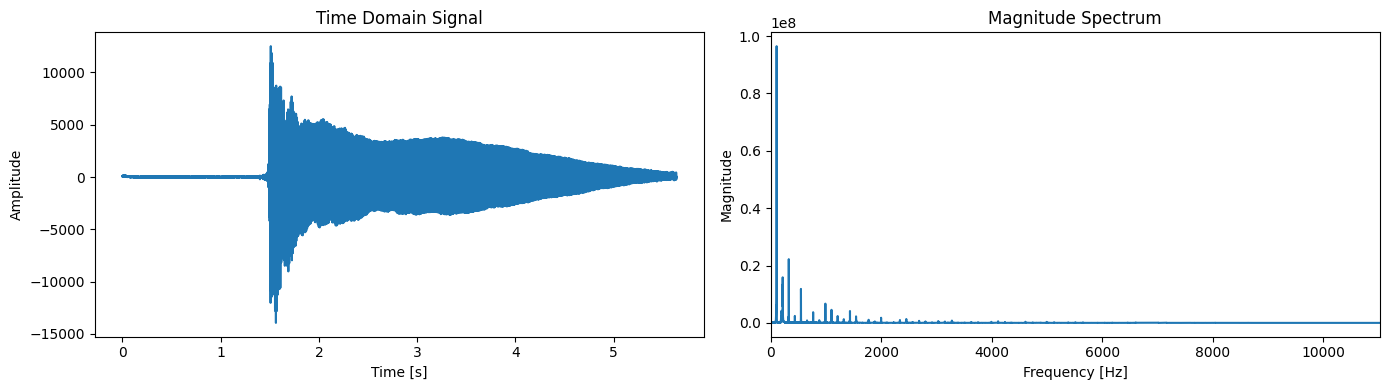

Detected frequency: 110.12 Hz
Closest note: A5 (110.0 Hz)
Difference: 0.12 Hz
Not in tune.


In [15]:
analyze_note("data/string_3.wav")

### Zoom in Images

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

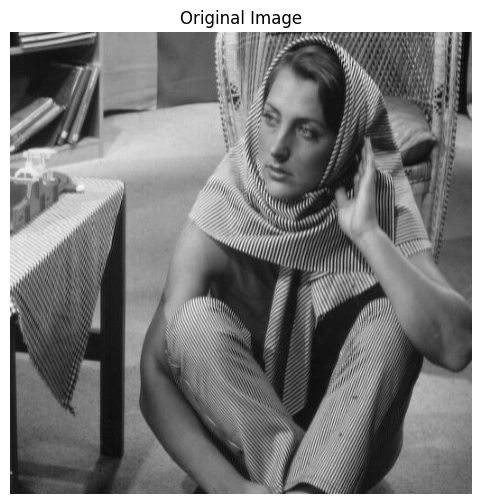

Image shape: (512, 512)


In [17]:
img = Image.open('data/barbara.jpg').convert('L')
img_np = np.array(img)

plt.figure(figsize=(6,6))
plt.imshow(img_np, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

print(f'Image shape: {img_np.shape}')

Spectral analysis of an image:  

We can see that most of the spectrum's energy is concentrated around the center (frequency 0), which appears at the center of the image due to the Fourier shift.

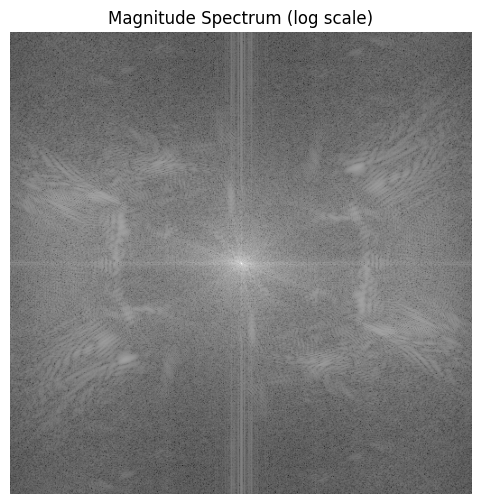

Frequency domain image shape: (512, 512)


In [18]:
f_img = np.fft.fft2(img_np)
f_img_shifted = np.fft.fftshift(f_img) # Shift the zero frequency component to the center
magnitude_spectrum = np.log(np.abs(f_img_shifted) + 1)# +1 to avoid log(0)

plt.figure(figsize=(6,6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (log scale)')
plt.axis('off')
plt.show()

print(f'Frequency domain image shape: {magnitude_spectrum.shape}')

Resize the image to get a smaller image of half size:

Spatial domain: subsampling



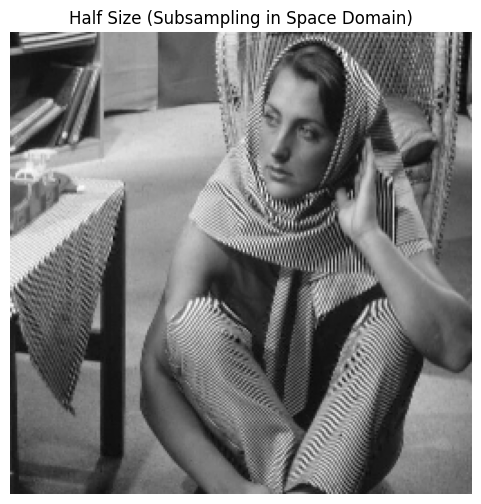

Half size image shape: (256, 256)


In [19]:
img_half_space = img_np[::2, ::2]

plt.figure(figsize=(6,6))
plt.imshow(img_half_space, cmap='gray')
plt.title('Half Size (Subsampling in Space Domain)')
plt.axis('off')
plt.show()

print(f'Half size image shape: {img_half_space.shape}')

Frequency domain: resizing

When we halve the image size in the spatial domain, we effectively double the sampling period. This is equivalent to halving the sampling frequency, which is achieved in the frequency domain by cropping the spectrum to half its size in both dimensions.

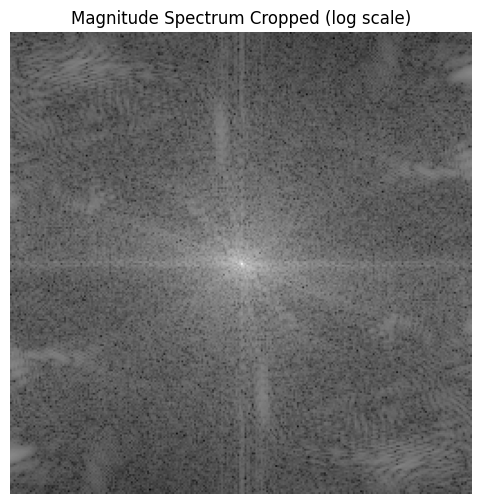

Frequency domain image shape: (256, 256)


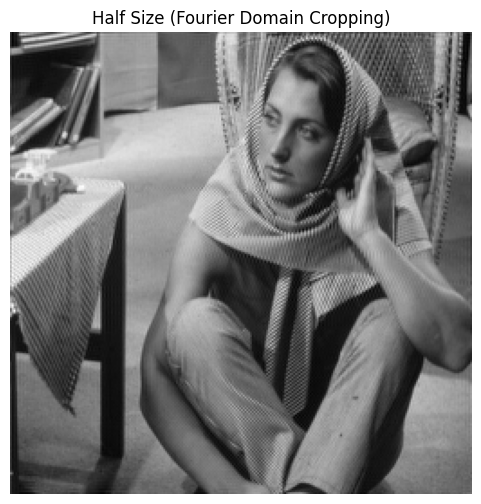

Half size image from Fourier shape: (256, 256)


In [ ]:
h, w = img_np.shape
f_img_shifted_cropped = f_img_shifted[h//4:3*h//4, w//4:3*w//4] # Crop the center half

magnitude_spectrum_cropped = np.log(np.abs(f_img_shifted_cropped) + 1)# +1 to avoid log(0)

plt.figure(figsize=(6,6))
plt.imshow(magnitude_spectrum_cropped, cmap='gray')
plt.title('Magnitude Spectrum Cropped (log scale)')
plt.axis('off')
plt.show()

print(f'Frequency domain image shape: {magnitude_spectrum_cropped.shape}')

# inverse FFT
f_img_cropped = np.fft.ifftshift(f_img_shifted_cropped)
img_half_fourier = np.fft.ifft2(f_img_cropped)
img_half_fourier = np.abs(img_half_fourier)

plt.figure(figsize=(6,6))
plt.imshow(img_half_fourier, cmap='gray')   
plt.title('Half Size (Fourier Domain Cropping)')
plt.axis('off')
plt.show()

print(f'Half size image from Fourier shape: {img_half_fourier.shape}')

Resize the image to get a bigger image of double size:

Spatial domain: linear interpolation

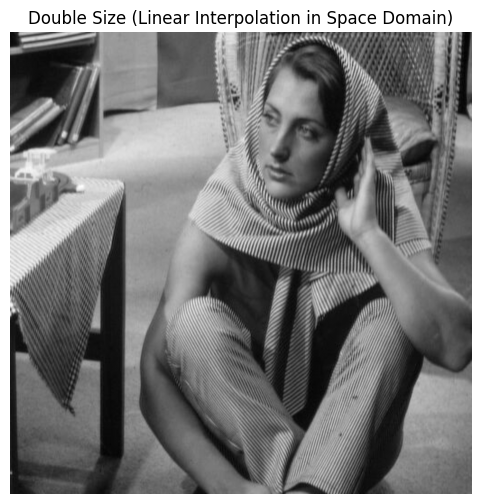

Double size image shape: (1024, 1024)


In [21]:
img_double_space = img.resize((img_np.shape[1]*2, img_np.shape[0]*2), Image.BILINEAR)
img_double_space_np = np.array(img_double_space)

plt.figure(figsize=(6,6))
plt.imshow(img_double_space_np, cmap='gray')
plt.title('Double Size (Linear Interpolation in Space Domain)')
plt.axis('off')
plt.show()

print(f'Double size image shape: {img_double_space_np.shape}')

Frequency domain: zero padding

When we double the image size in the spatial domain, we effectively halve the sampling period. This is equivalent to doubling the sampling frequency, which is achieved in the frequency domain by zero-padding the spectrum to double its size in both dimensions.

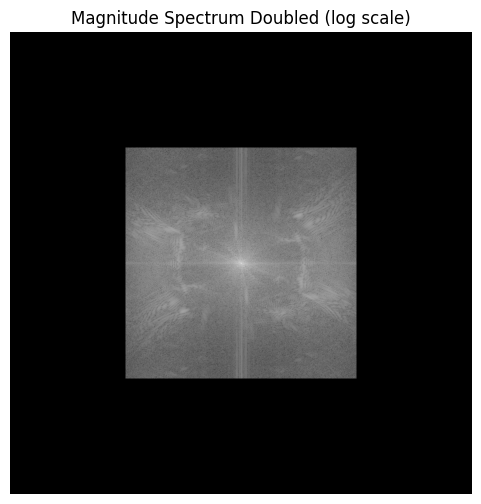

Frequency domain image shape: (1024, 1024)


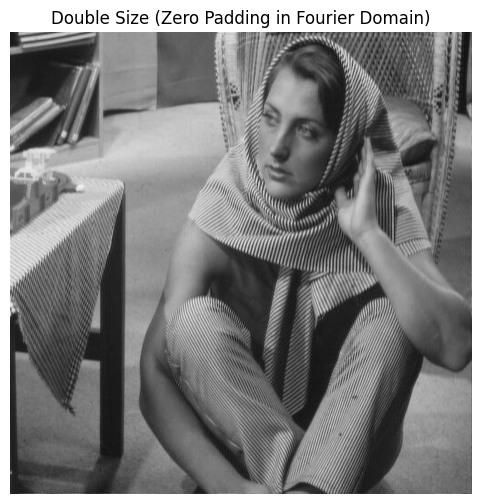

Double size image from Fourier shape: (1024, 1024)


In [22]:
h, w = img_np.shape
f_img_shifted_double = np.zeros((h*2, w*2), dtype=f_img_shifted.dtype)
f_img_shifted_double[h//2:3*h//2, w//2:3*w//2] = f_img_shifted

magnitude_spectrum_double = np.log(np.abs(f_img_shifted_double) + 1)# +1 to avoid log(0)

plt.figure(figsize=(6,6))
plt.imshow(magnitude_spectrum_double, cmap='gray')
plt.title('Magnitude Spectrum Doubled (log scale)')
plt.axis('off')
plt.show()

print(f'Frequency domain image shape: {magnitude_spectrum_double.shape}')

f_img_double = np.fft.ifftshift(f_img_shifted_double)
img_double_fourier = np.fft.ifft2(f_img_double)
img_double_fourier = np.abs(img_double_fourier)

plt.figure(figsize=(6,6))
plt.imshow(img_double_fourier, cmap='gray')
plt.title('Double Size (Zero Padding in Fourier Domain)')
plt.axis('off')
plt.show()

print(f'Double size image from Fourier shape: {img_double_fourier.shape}')

In both image resizings, the spectrum acts as an ideal filter (a window filter with values of either 0 or 1) due to cropping or zero-padding. This sharp filtering introduces ripples, known as the Gibbs effect, which appear as 'wavy' edges in the spatial domain. The inverse FFT of an ideal filter is the sinc function: $$\mathrm{sinc}(x) = \frac{\sin{x}}{x}$$